# 5 aula - Exemplificando os Conceitos de:

*   Esperança
*   Variância
*   Matriz de covariância
*   Correlação



# 1) Exemplo de Esperança




## 1.1) Valor Esperado de uma Varíavel Aleatória Discreta
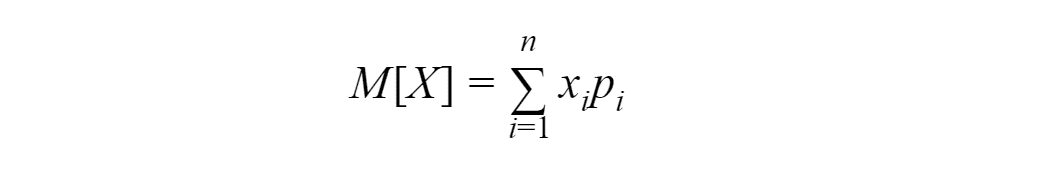

In [3]:
def expected_value(values, probabilities):
    return sum([v * p for v, p in zip(values, probabilities)])

In [2]:
list(zip([1, 2, 3], [0.2, 0.3, 0.5]))

[(1, 0.2), (2, 0.3), (3, 0.5)]

In [4]:
expected_value([1, 2, 3], [0.2, 0.3, 0.5])

2.3

### Tutorial para aprender usar o zip https://www.tutorialsteacher.com/python/zip-method

## 1.2) Exemplo de Moda - Variavel Discreta

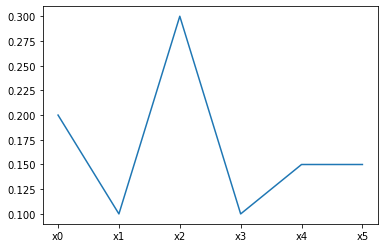

In [5]:
probabilities = [0.2, 0.1, 0.3, 0.1, 0.15, 0.15]

from matplotlib.pyplot import plot
plot(['x' + str(i) for i, _ in enumerate(probabilities)], probabilities);

In [6]:
print(list(enumerate(probabilities)))

[(0, 0.2), (1, 0.1), (2, 0.3), (3, 0.1), (4, 0.15), (5, 0.15)]


In [13]:
['x' + str(i)  for i, j in enumerate(probabilities)]

['x0', 'x1', 'x2', 'x3', 'x4', 'x5']

In [14]:
def mode_for_discrete(probabilities):
    return max(probabilities)

probabilities = [0.2, 0.1, 0.3, 0.1, 0.15, 0.15]
print('A moda é atingida em: ', mode_for_discrete(probabilities))

A moda é atingida em:  0.3


## 1.3) Exemplo de moda para Variável Contínua

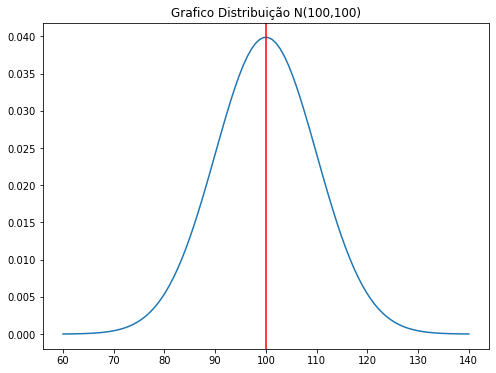

In [17]:
from scipy.stats import norm 
import numpy as np
import matplotlib.pyplot as plt


mu = 100
variance = 100
sigma = 100**0.5

# pontos para desenhar a curva normal 
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(8,6))
plt.title('Grafico Distribuição N(100,100)')
plt.plot(x,y)
plt.axvline(x=100, color='r', linestyle='-')
plt.show()

In [20]:
from scipy.stats import norm 
import numpy as np

mean, var, skew, kurt = norm.stats(loc=100, scale=10, moments='mvsk')
print('A média é',mean,'e a variância é',var)

A média é 100.0 e a variância é 100.0


# 2) Variância, Covariância e Correlação: Definições e exemplos.

## 2.1) A diferença entre variância, covariância e correlação é:

*   A variância é uma medida de variabilidade da média.
*   A covariância é uma medida de relação entre a variabilidade de 2 variáveis - a covariância depende da escala porque não é padronizada.
*   A correlação é uma relação entre a variabilidade de 2 variáveis - a correlação é padronizada tornando-a não dependente da escala.

In [38]:
import pandas as pd
import numpy as np

# Setting a seed so the example is reproducible
np.random.seed(4272018)

df = pd.DataFrame(np.random.randint(low= 0, high= 20, size= (5, 2)),
                  columns= ['Comerciais Assistidos', 'Produtos Comprados'])

df

,Comerciais Assistidos,Produtos Comprados
0,10,13
1,15,0
2,7,7
3,2,4
4,16,11


In [23]:
df.agg(["mean", "std"])

,Comerciais Assistidos,Produtos Comprados
mean,10.000000,7.000000
std,5.787918,5.244044


## 2.2) O QUE É VARIÂNCIA?
A variância é uma medida de quanto os dados de uma variável variam de sua média. Isso pode ser representado com a seguinte equação:
 
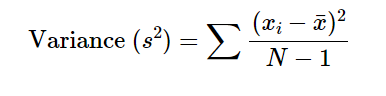


O cálculo manual para os comerciais assistidos produziria os seguintes resultados:

### Variável: Comerciais Assistidos

*   Média $ = (10 + 15 + 7 + 2 + 16) / 5 = 10,00$

*   Variância  $= ((10 - 10)^2 + (15 - 10)^2 + (7 - 10)^2 + (2 - 10)^2 + (16 - 10) 2)^/ (5 - 1)$
*   Variância  $= 33,5$

Isso pode ser calculado facilmente dentro do Python - particularmente ao usar o Pandas. 

Embora Pandas não seja o único pacote disponível que irá calcular a variância. 

Usando o Pandas, basta inserir o seguinte:

In [24]:
df.var()

Comerciais Assistidos    33.5
Produtos Comprados       27.5
dtype: float64

## 2.3) O QUE É COVARIÂNCIA?

A covariância é uma medida de relacionamento entre 2 variáveis que é dependente da escala, ou seja, quanto uma variável mudará quando outra variável mudar. 

Isso pode ser representado com a seguinte equação:


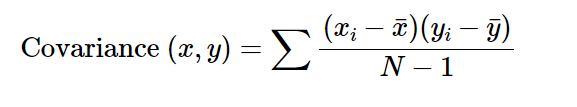

A fórmula é muito semelhante à fórmula usada para calcular a variância. A diferença é que, em vez de elevar ao quadrado as diferenças entre o ponto de dados e a média dessa variável, em vez disso, um multiplica essa diferença pela diferença da outra variável.

A covariância entre os comerciais assistidos e as compras de produtos pode ser calculada manualmente e produziria os seguintes resultados:

### Variáveis: Comerciais Assistidos e Compras de Produtos


$Covariância (x, y) = ((10 - 10) (13 - 7) + (15 - 10) (0 - 7) + (7 - 10) (7 - 7) + (2 - 10) (4 - 7 ) + (16 - 10) (11 - 7)) / (5 - 1) = 3,25$


Novamente, isso pode ser calculado facilmente dentro do Python - particularmente ao usar o Pandas. 

Embora Pandas não seja o único pacote disponível que irá calcular a covariância. Usando o Pandas, basta inserir o seguinte:

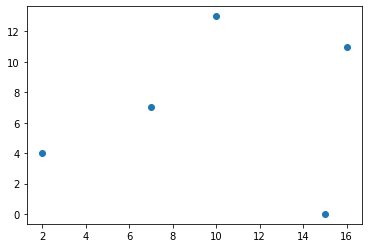

In [39]:
x = df['Comerciais Assistidos']
y = df['Produtos Comprados']

from matplotlib.pyplot import scatter
scatter(x,y);

In [32]:
x

array([ 0,  8,  0,  1, 19])

In [40]:
df.cov()

,Comerciais Assistidos,Produtos Comprados
Comerciais Assistidos,33.50,3.25
Produtos Comprados,3.25,27.50


## 2.4) O QUE É CORRELAÇÃO?


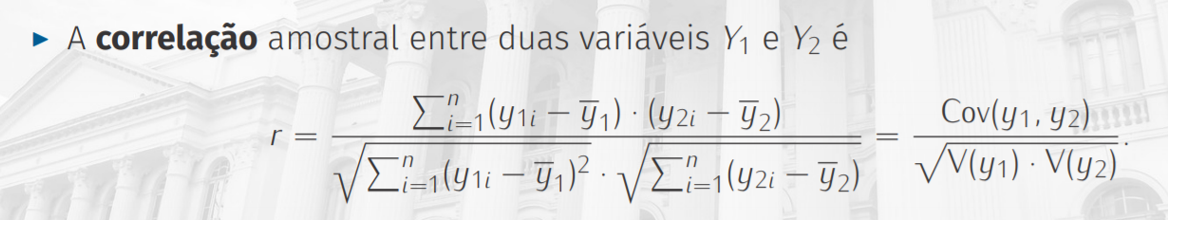

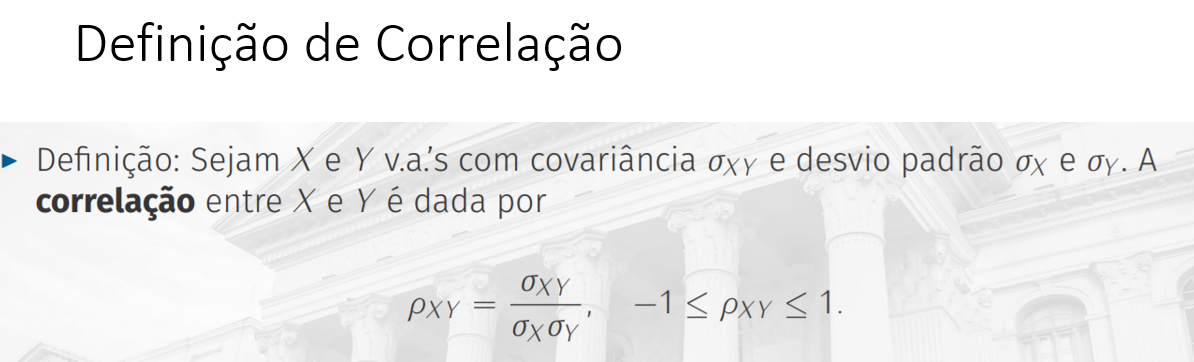

In [41]:
df.corr()

,Comerciais Assistidos,Produtos Comprados
Comerciais Assistidos,1.000000,0.107077
Produtos Comprados,0.107077,1.000000


### Prova dos 9

In [42]:
3.25/(33.5*27.5)**0.5

0.10707660935690119

In [43]:
print("Final da Parte 2")

Final da Parte 2


# 3) Exemplo de Correlação entre variáveis

In [ ]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
import pandas as pd

from matplotlib import pyplot

# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

df= pd.DataFrame({"x1":data1,"x2":data2})
df.head()

In [ ]:
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

In [ ]:
# plot
pyplot.scatter(data1, data2)
pyplot.show()

In [ ]:
# calculate the covariance between two variables
# calculate covariance matrix
covariance = np.cov(data1, data2, ddof=0)
print(covariance)

In [ ]:
type(covariance)

In [ ]:
covariance[0][0]**0.5

In [ ]:
np.std(data1)

In [ ]:
covariance[0][1]

In [ ]:
covariance[1][0]

In [ ]:
covariance[1][1]

In [ ]:
covariance[0][1]/((covariance[0][0]**0.5)*(covariance[1][1]**0.5))

In [ ]:
np.corrcoef(data1,data2)

In [ ]:
print("Final da Parte 3")